# Analyse exploratoire — Nouveau-nés (Sprint 2)

**Question de réflexion :** *Peut-on prédire le risque de complications chez les nouveau-nés à partir des données cliniques disponibles ?*

**But du notebook :** fournir un travail complet et documenté (nettoyage, détection d'outliers, analyses, visualisations, hypothèses et tests) prêt à remettre pour le Sprint 2. Le code initial fourni par l'équipe est conservé inchangé en première cellule, puis des cellules supplémentaires détaillées sont ajoutées.

---

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


# Étape 1 : Importer le fichier CSV
data = df = pd.read_csv("C:/Users/amazi/Downloads/projet_session3/newborn_health_monitoring_with_risk.csv")

#selection des colonnes pertinantes
colonnes = [
    'baby_id', 'gender', 'gestational_age_weeks', 'birth_weight_kg', 'birth_length_cm',
    'date', 'age_days', 'weight_kg', 'length_cm', 'temperature_c', 'heart_rate_bpm',
    'respiratory_rate_bpm', 'feeding_type', 'jaundice_level_mg_dl', 'apgar_score',
    'immunizations_done', 'reflexes_normal', 'risk_level'
]


#  Étape 2 : Aperçu des données
print("Aperçu des données :")
print(df.head())

Aperçu des données :
  baby_id  name  gender  gestational_age_weeks  birth_weight_kg  \
0    B001  Sara  Female                   40.2              3.3   
1    B001  Sara  Female                   40.2              3.3   
2    B001  Sara  Female                   40.2              3.3   
3    B001  Sara  Female                   40.2              3.3   
4    B001  Sara  Female                   40.2              3.3   

   birth_length_cm  birth_head_circumference_cm        date  age_days  \
0             50.0                         31.9  2024-12-10         1   
1             50.0                         31.9  2024-12-11         2   
2             50.0                         31.9  2024-12-12         3   
3             50.0                         31.9  2024-12-13         4   
4             50.0                         31.9  2024-12-14         5   

   weight_kg  ...  oxygen_saturation   feeding_type  \
0       3.28  ...                 98        Formula   
1       3.35  ...          

**Explication :** Cette première cellule reprend exactement le code que vous avez fourni. Elle importe pandas, missingno et matplotlib, charge le fichier CSV depuis le chemin demandé, sélectionne uniquement les colonnes pertinentes et affiche un aperçu des 5 premières lignes. Ne modifiez pas cette cellule pour garder la traçabilité du travail initial.

In [ ]:
print(df.describe())

       gestational_age_weeks  birth_weight_kg  birth_length_cm  \
count            3000.000000      3000.000000      3000.000000   
mean               38.878000         3.205000        49.727000   
std                 1.570076         0.561555         2.145065   
min                35.400000         1.860000        45.100000   
25%                37.800000         2.870000        48.475000   
50%                38.800000         3.165000        49.550000   
75%                40.100000         3.625000        51.025000   
max                43.000000         4.470000        55.800000   

       birth_head_circumference_cm     age_days    weight_kg    length_cm  \
count                  3000.000000  3000.000000  3000.000000  3000.000000   
mean                     34.128000    15.500000     3.669730    50.508000   
std                       1.486254     8.656884     0.621355     2.196846   
min                      31.200000     1.000000     1.790000    45.000000   
25%                 

In [ ]:
# Inspection initiale (shape, types, valeurs manquantes)
print("Shape:", df.shape)
print("\nTypes des colonnes :")
print(df.dtypes)
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum().sort_values(ascending=False))

Shape: (3000, 25)

Types des colonnes :
baby_id                         object
name                            object
gender                          object
gestational_age_weeks          float64
birth_weight_kg                float64
birth_length_cm                float64
birth_head_circumference_cm    float64
date                            object
age_days                         int64
weight_kg                      float64
length_cm                      float64
head_circumference_cm          float64
temperature_c                  float64
heart_rate_bpm                   int64
respiratory_rate_bpm             int64
oxygen_saturation                int64
feeding_type                    object
feeding_frequency_per_day        int64
urine_output_count               int64
stool_count                      int64
jaundice_level_mg_dl           float64
apgar_score                    float64
immunizations_done              object
reflexes_normal                 object
risk_level              

**Explication :** Cette cellule montre la taille du jeu de données, le type de chaque colonne (utile pour détecter des colonnes mal typées) et le nombre de valeurs manquantes par colonne. Ces informations orientent nos choix de nettoyage.

In [ ]:
# Conversion de la colonne 'date' en datetime (si présente)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("Conversion 'date' effectuée. Nombre de NaT :", df['date'].isna().sum())

# Statistiques descriptives rapides (numériques)
print('\nStatistiques descriptives (variables numériques) :')
display(df.describe().T)

Conversion 'date' effectuée. Nombre de NaT : 0

Statistiques descriptives (variables numériques) :


,count,mean,min,25%,50%,75%,max,std
gestational_age_weeks,3000.0,38.878,35.4,37.8,38.8,40.1,43.0,1.570076
birth_weight_kg,3000.0,3.205,1.86,2.87,3.165,3.625,4.47,0.561555
birth_length_cm,3000.0,49.727,45.1,48.475,49.55,51.025,55.8,2.145065
birth_head_circumference_cm,3000.0,34.128,31.2,32.975,34.1,34.8,38.1,1.486254
date,3000,2025-02-26 23:16:48.000000256,2024-08-23 00:00:00,2024-12-02 00:00:00,2025-03-01 00:00:00,2025-05-19 06:00:00,2025-09-17 00:00:00,NaN
age_days,3000.0,15.5,1.0,8.0,15.5,23.0,30.0,8.656884
weight_kg,3000.0,3.66973,1.79,3.22,3.66,4.1,5.41,0.621355
length_cm,3000.0,50.508,45.0,49.1,50.4,51.8,57.4,2.196846
head_circumference_cm,3000.0,34.4389,31.1,33.3,34.4,35.3,38.7,1.500893
temperature_c,3000.0,37.002933,35.8,36.8,37.0,37.2,38.1,0.310747


**Explication :** On convertit la colonne 'date' en type datetime pour pouvoir l'utiliser si besoin (séries temporelles ou filtres). Ensuite on affiche les statistiques descriptives de base (count, mean, std, min, 25%, 50%, 75%, max) pour repérer valeurs anormales ou plages inattendues.

ENCODAGE DES VAriables

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encodage des variables binaires
le = LabelEncoder()

df["gender_code"] = le.fit_transform(df["gender"])
df["immunizations_done_code"] = le.fit_transform(df["immunizations_done"])
df["reflexes_normal_code"] = le.fit_transform(df["reflexes_normal"])

# Encodage des types d’alimentation (Breastfeeding, Formula, Mixed)
df_encoded = pd.get_dummies(df, columns=["feeding_type"])

print(df_encoded.head())


  baby_id  name  gender  gestational_age_weeks  birth_weight_kg  \
0    B001  Sara  Female                   40.2              3.3   
1    B001  Sara  Female                   40.2              3.3   
2    B001  Sara  Female                   40.2              3.3   
3    B001  Sara  Female                   40.2              3.3   
4    B001  Sara  Female                   40.2              3.3   

   birth_length_cm  birth_head_circumference_cm       date  age_days  \
0             50.0                         31.9 2024-12-10         1   
1             50.0                         31.9 2024-12-11         2   
2             50.0                         31.9 2024-12-12         3   
3             50.0                         31.9 2024-12-13         4   
4             50.0                         31.9 2024-12-14         5   

   weight_kg  ...  apgar_score  immunizations_done  reflexes_normal  \
0       3.28  ...          7.0                 Yes              Yes   
1       3.35  ...     

In [ ]:
df=df_encoded

baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
gender_code                       0
immunizations_done_code           0
reflexes_normal_code              0
feeding_type_Breastfeeding  

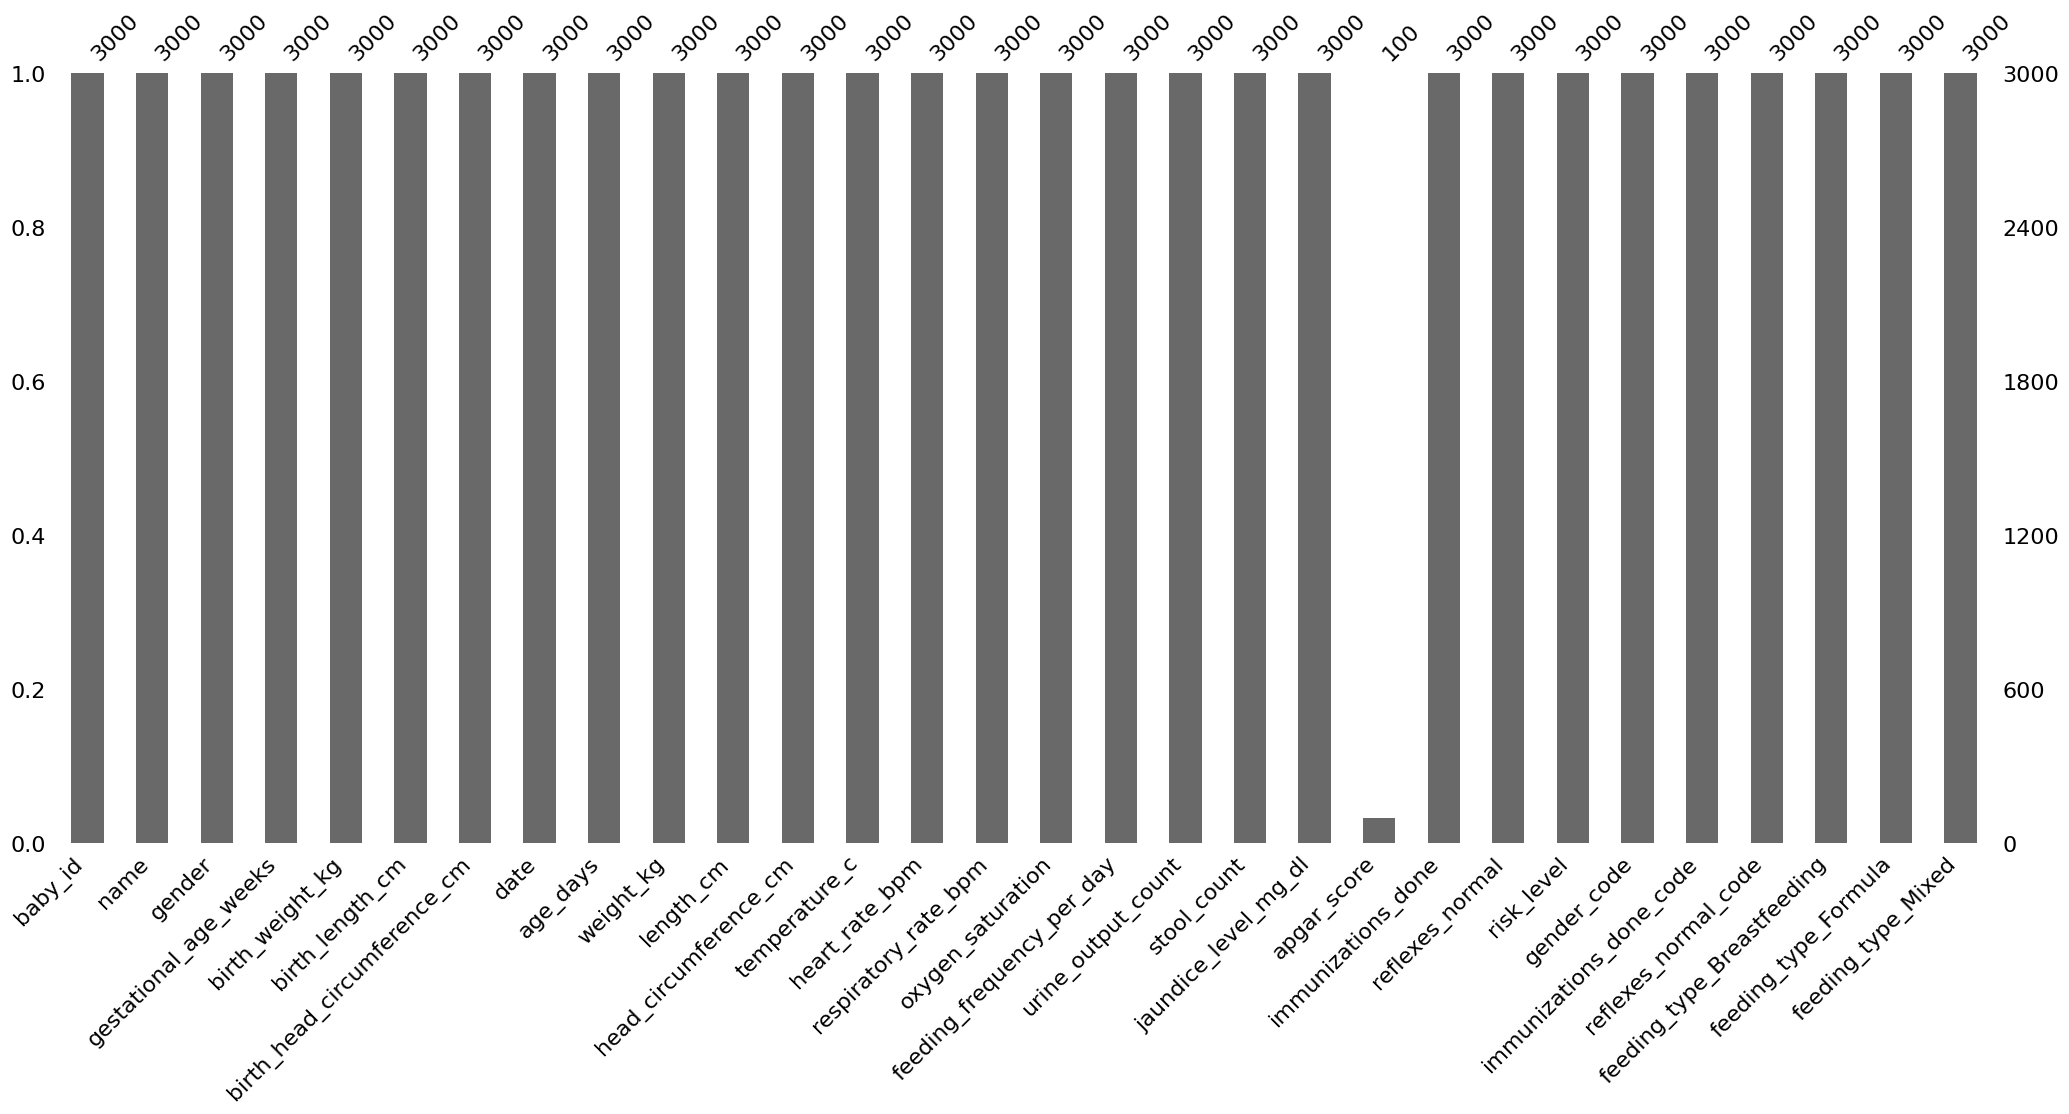

In [ ]:
print(df_encoded.isnull().sum())

# Matrice des valeurs manquantes
msno.bar(df)
plt.show()

In [ ]:
# Détection et suppression des doublons
dups = int(df.duplicated().sum())
print("Doublons détectés :", dups)
if dups>0:
    df.drop_duplicates(inplace=True)
    print("Doublons supprimés. Nouvelle shape :", df.shape)

Doublons détectés : 0


## valeur aberrantes



## Détection des outliers — méthode IQR
Nous utilisons la méthode standard IQR (Q1, Q3 ± 1.5*IQR) pour détecter les outliers sur chaque variable numérique.

**Explication :** Cette cellule calcule les bornes IQR et le nombre d'outliers par variable. Le tableau est sauvegardé pour votre rapport. Vous pourrez justifier si vous décidez de supprimer ou de winsoriser les outliers.

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Détection des valeurs aberrantes par IQR
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Affichage des résultats
print("📌 Nombre de valeurs aberrantes par colonne :")
for col, count in sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True):
    print(f"{col}: {count}")

    


📌 Nombre de valeurs aberrantes par colonne :
reflexes_normal_code: 717
jaundice_level_mg_dl: 468
immunizations_done_code: 200
oxygen_saturation: 145
birth_head_circumference_cm: 60
length_cm: 38
heart_rate_bpm: 38
birth_length_cm: 30
head_circumference_cm: 20
temperature_c: 14
respiratory_rate_bpm: 12
weight_kg: 2
gestational_age_weeks: 0
birth_weight_kg: 0
age_days: 0
feeding_frequency_per_day: 0
urine_output_count: 0
stool_count: 0
apgar_score: 0
gender_code: 0


In [ ]:
outlier_values = {}

# Détection des valeurs aberrantes par IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Liste des valeurs aberrantes
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    outlier_values[col] = outliers

# Affichage des résultats
for col, values in outlier_values.items():
    print(f"\n📌 Valeurs aberrantes pour '{col}' ({len(values)} valeurs) :")
    print(values)

   


📌 Valeurs aberrantes pour 'gestational_age_weeks' (0 valeurs) :
[]

📌 Valeurs aberrantes pour 'birth_weight_kg' (0 valeurs) :
[]

📌 Valeurs aberrantes pour 'birth_length_cm' (30 valeurs) :
[55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8, 55.8]

📌 Valeurs aberrantes pour 'birth_head_circumference_cm' (60 valeurs) :
[38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 38.1, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6]

📌 Valeurs aberrantes pour 'age_days' (0 valeurs) :
[]

📌 Valeurs aberrantes pour 'weight_kg' (2 valeurs) :
[1.79, 1.89]

📌 Valeurs aberrantes pour 'length_cm' (38 valeurs) :
[56.2, 55.9, 56.0, 55

**Explication :** Cette cellule applique la stratégie de remplissage. Pour chaque colonne numérique on remplace les NaN par la médiane; pour chaque colonne catégorielle on remplace par le mode. Les remplacements sont affichés pour que vous puissiez justifier ce choix dans le rapport.

**Explication :** On supprime les doublons (lignes répétées) pour éviter de biaiser les statistiques et modèles. Le nombre de doublons détectés est indiqué.

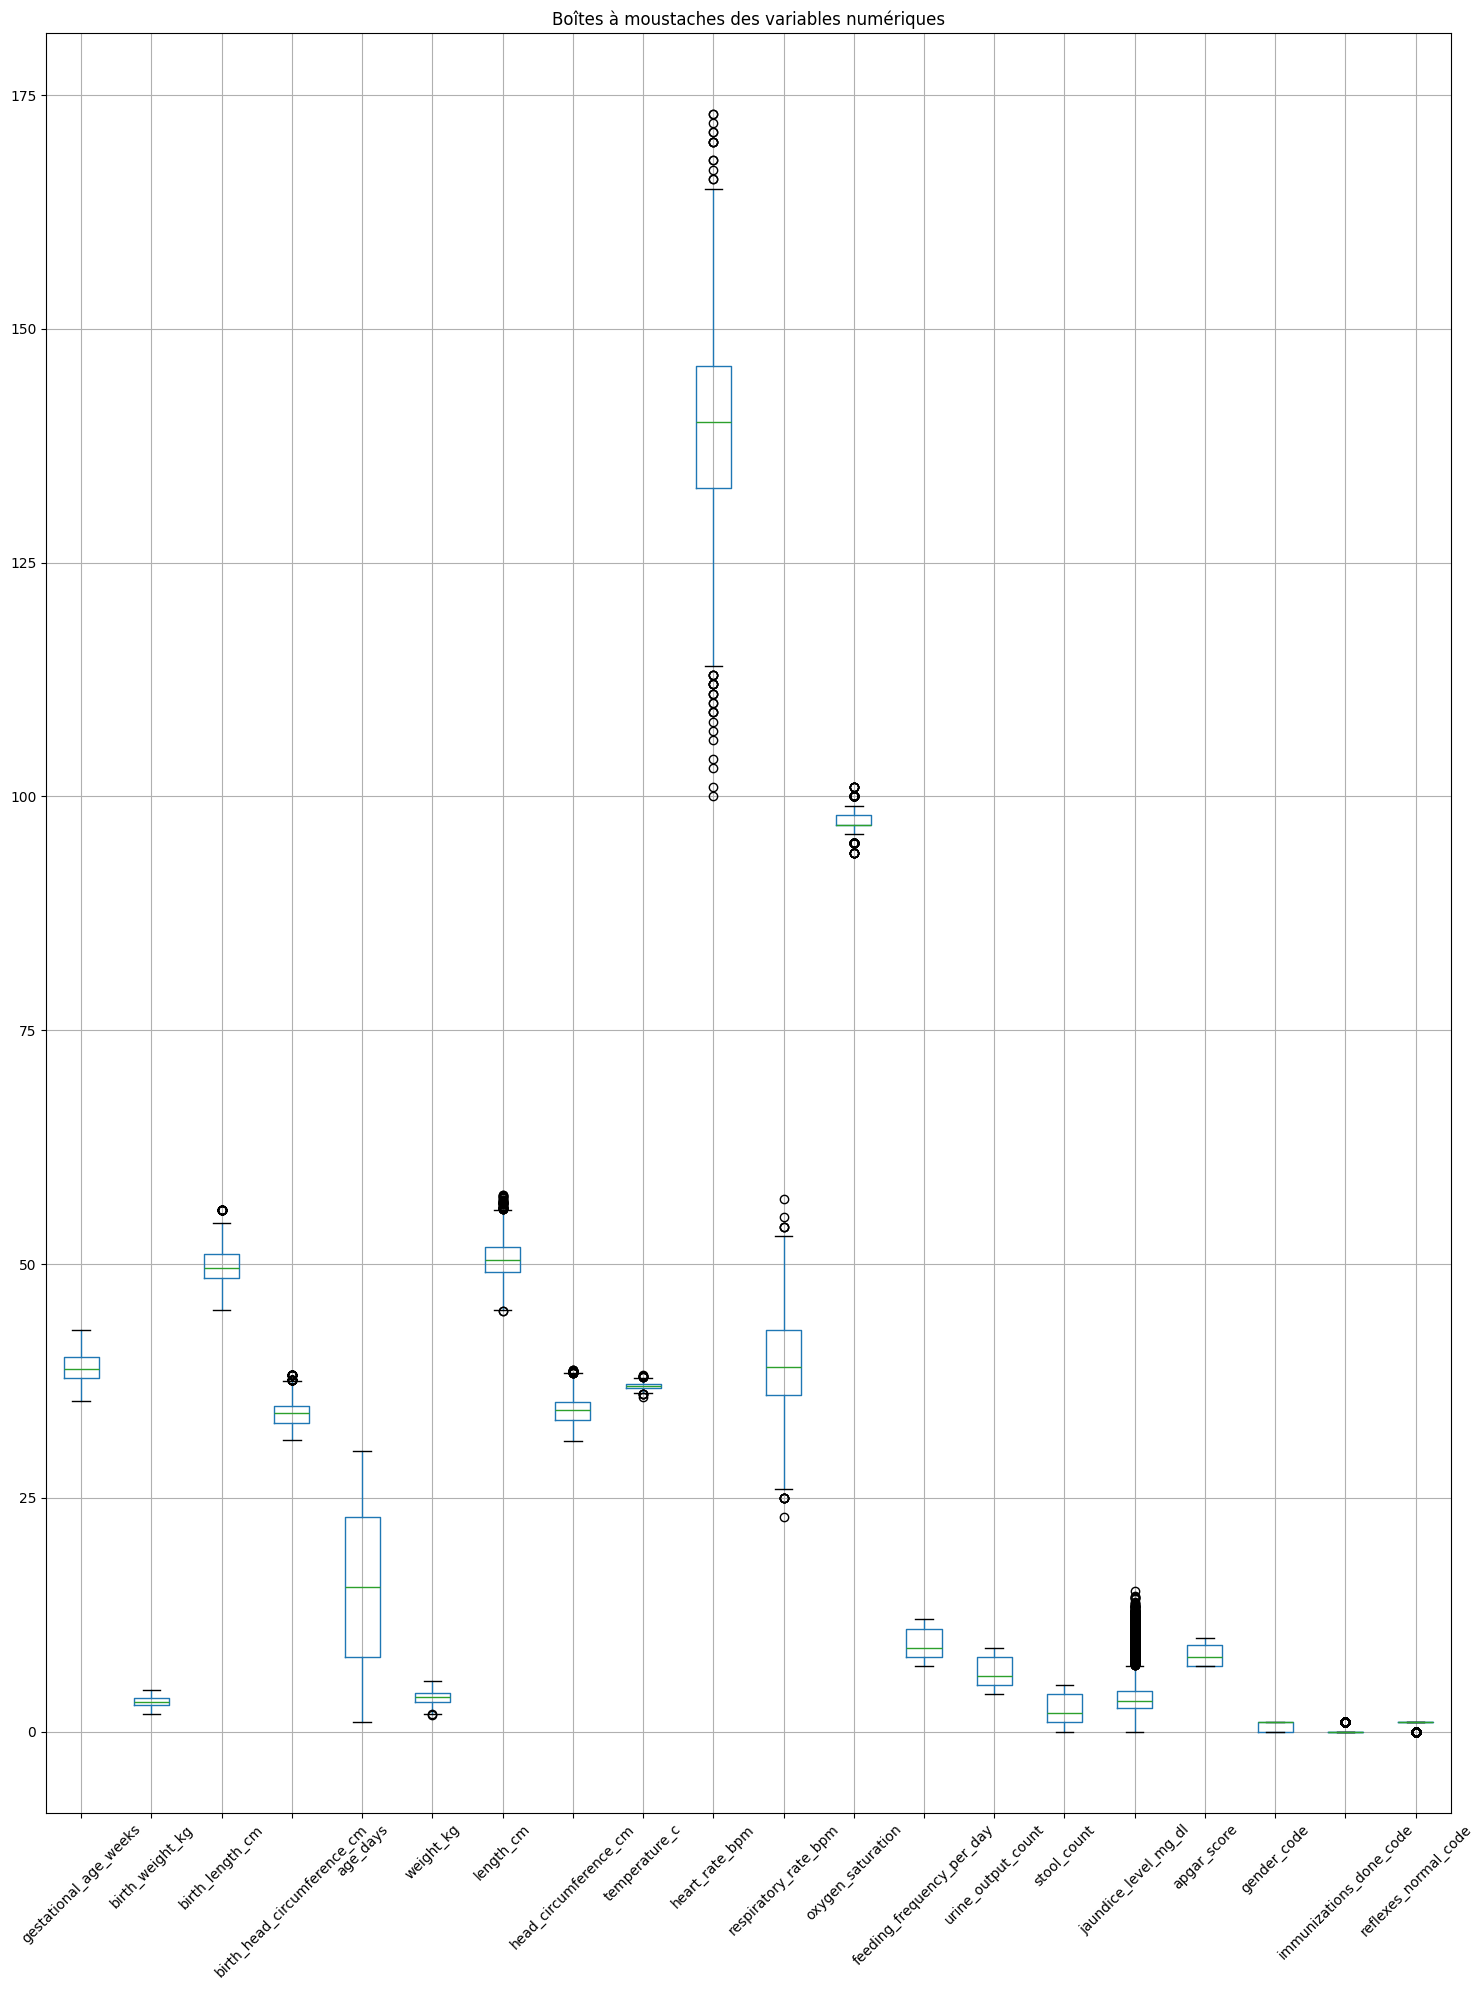

In [ ]:
import seaborn as sns

#Sélection des colonnes numériques uniquement
colonnes_numeriques = df_encoded.select_dtypes(include=['number']).columns

# Étape 4 : Création des boxplots
plt.figure(figsize=(15,20))
df_encoded[colonnes_numeriques].boxplot(rot=45)
plt.title("Boîtes à moustaches des variables numériques")
plt.tight_layout()
plt.show()


In [ ]:
# Sauvegarde de l'état nettoyé (avant traitement des outliers)
df.to_csv('cleaned_before_outliers.csv', index=False)
print("Fichier sauvegardé : cleaned_before_outliers.csv")

Fichier sauvegardé : cleaned_before_outliers.csv


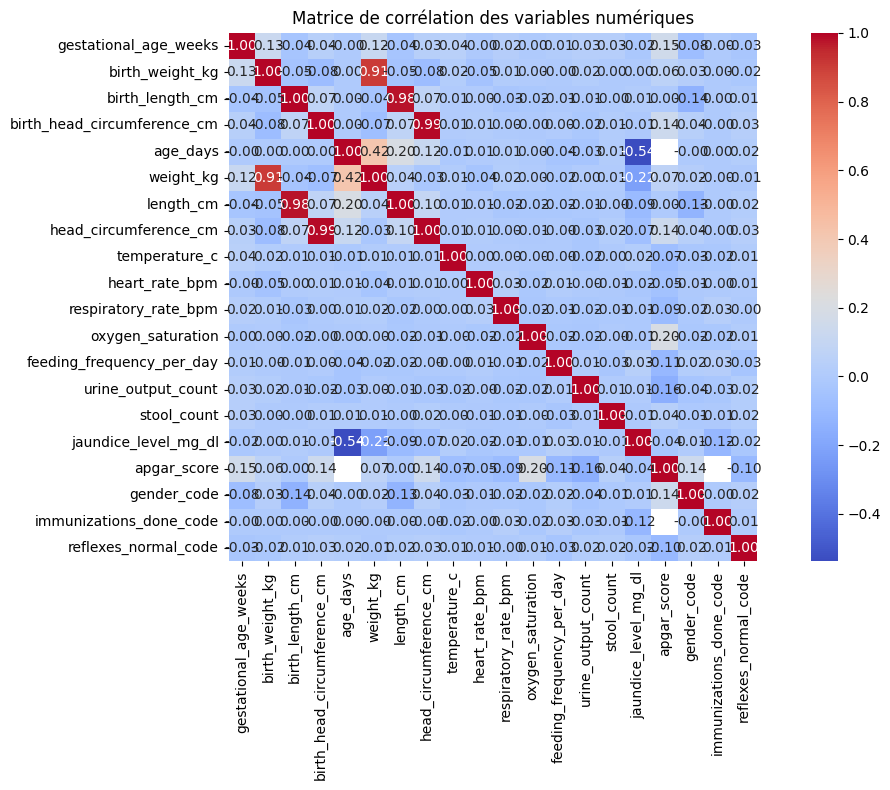

In [ ]:
import seaborn as sns


#  Sélection des colonnes numériques
colonnes_numeriques = df.select_dtypes(include='number')

#  Calcul de la matrice de corrélation
correlation_matrix = colonnes_numeriques.corr()

#  Affichage avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()


- La diagonale est toujours à 1.00 (chaque variable est parfaitement corrélée avec elle-même).
- Les valeurs proches de 1 indiquent une forte corrélation positive (ex. gestational_age_weeks et birth_weight_kg à 0.85).
- Les valeurs proches de -1 indiquent une forte corrélation négative.
- Les valeurs proches de 0 indiquent peu ou pas de corrélation.

 À quoi ça sert ?
- Identifier les variables redondantes ou fortement liées.
- Détecter des relations intéressantes pour la modélisation ou l’analyse.
- Choisir des variables pertinentes pour la réduction de dimension ou la sélection de features.
Souhaites-tu que je t’aide à extraire automatiquement les corrélations supérieures à un seuil (ex. > 0.7) ou à visualiser uniquement les plus fortes ? Je peux te générer ça en une ligne.


In [ ]:
print(df.columns)


Index(['baby_id', 'name', 'gender', 'gestational_age_weeks', 'birth_weight_kg',
       'birth_length_cm', 'birth_head_circumference_cm', 'date', 'age_days',
       'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c',
       'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation',
       'feeding_frequency_per_day', 'urine_output_count', 'stool_count',
       'jaundice_level_mg_dl', 'apgar_score', 'immunizations_done',
       'reflexes_normal', 'risk_level', 'gender_code',
       'immunizations_done_code', 'reflexes_normal_code',
       'feeding_type_Breastfeeding', 'feeding_type_Formula',
       'feeding_type_Mixed'],
      dtype='object')


In [ ]:
# Reconstruction de feeding_type à partir des dummies
df['feeding_type'] = df[['feeding_type_Breastfeeding', 
                         'feeding_type_Formula', 
                         'feeding_type_Mixed']].idxmax(axis=1)

# Nettoyage du nom ("feeding_type_Formula" → "Formula")
df['feeding_type'] = df['feeding_type'].str.replace('feeding_type_', '')


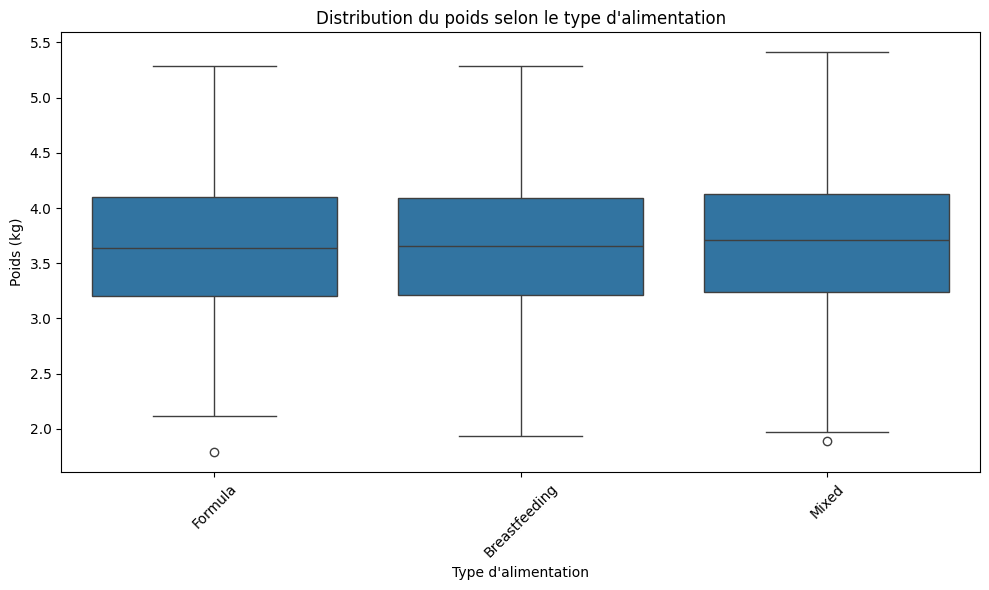

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='feeding_type', y='weight_kg', data=df_encoded)

plt.title("Distribution du poids selon le type d'alimentation")
plt.xlabel("Type d'alimentation")
plt.ylabel("Poids (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


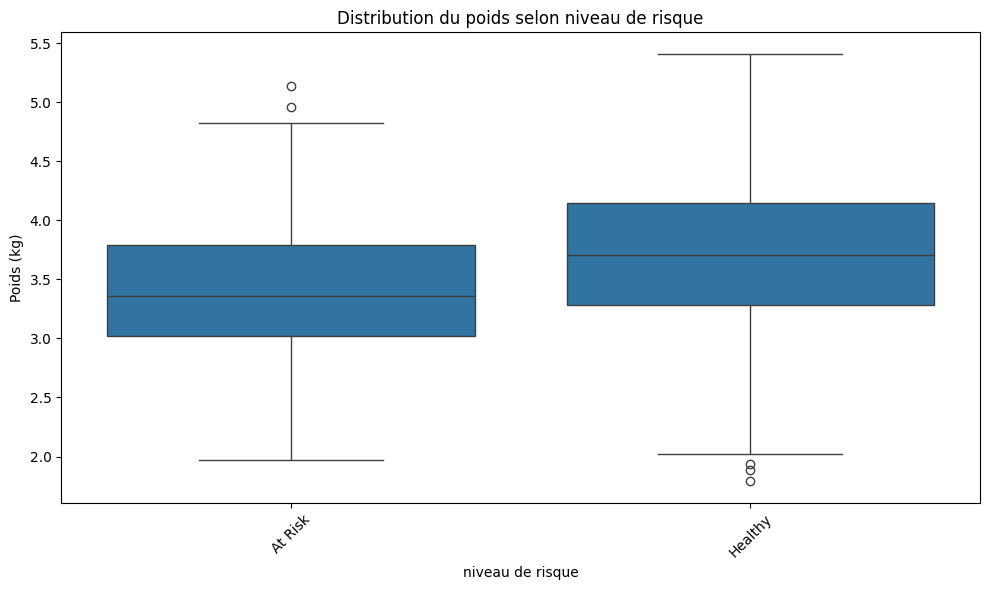

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_level', y='weight_kg', data=df)

plt.title("Distribution du poids selon niveau de risque")
plt.xlabel("niveau de risque")
plt.ylabel("Poids (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Traitement des outliers 
- **Winsorisation** : remplacement des valeurs extrêmes par la borne correspondante (utile si valeurs plausibles mainfluentes).

In [ ]:
 def iqr_bounds(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

In [ ]:

num_cols = df.select_dtypes(include=['number']).columns.tolist()

cat_cols = [c for c in df.columns if c not in num_cols]
 
print("Colonnes numériques :", num_cols)

print("Colonnes catégorielles :", cat_cols)
 
# Winsorisation (clip)

df_winsor = df.copy()
for c in num_cols:
    lb, ub = iqr_bounds(df_winsor[c])
    df_winsor[c] = df_winsor[c].clip(lb, ub)
print("Shape après winsorisation :", df_winsor.shape)
df_winsor.to_csv('cleaned_after_winsor.csv', index=False)

Colonnes numériques : ['gestational_age_weeks', 'birth_weight_kg', 'birth_length_cm', 'birth_head_circumference_cm', 'age_days', 'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation', 'feeding_frequency_per_day', 'urine_output_count', 'stool_count', 'jaundice_level_mg_dl', 'apgar_score', 'gender_code', 'immunizations_done_code', 'reflexes_normal_code']
Colonnes catégorielles : ['baby_id', 'name', 'gender', 'date', 'immunizations_done', 'reflexes_normal', 'risk_level', 'feeding_type_Breastfeeding', 'feeding_type_Formula', 'feeding_type_Mixed', 'feeding_type']
Shape après winsorisation : (3000, 31)


## Visualisations — distributions et comparaisons
Les graphiques suivants sont produits par le code : histogrammes (distribution), boxplots comparatifs (original / winsor / strict) et matrice de corrélation (winsorisée). Chaque graphique est sauvegardé en PNG dans le dossier courant.

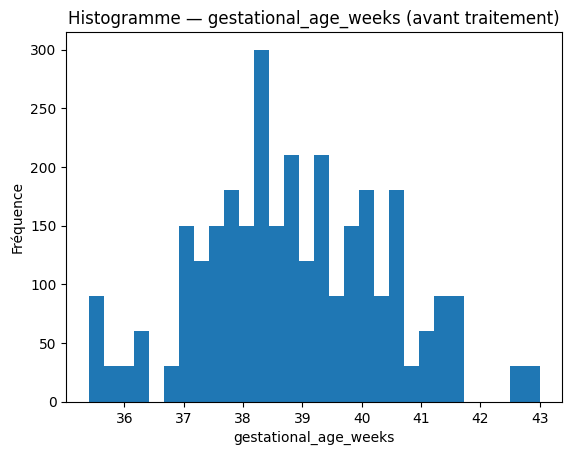

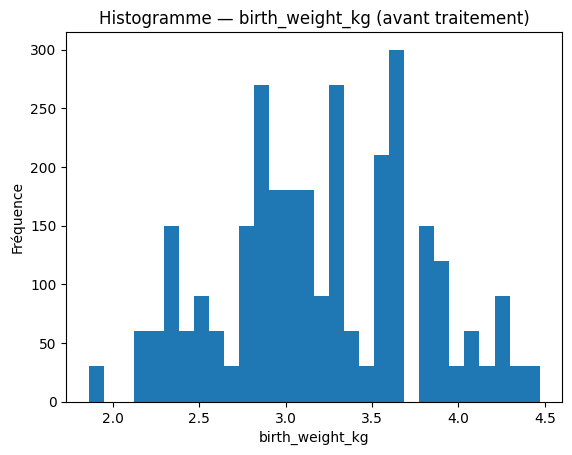

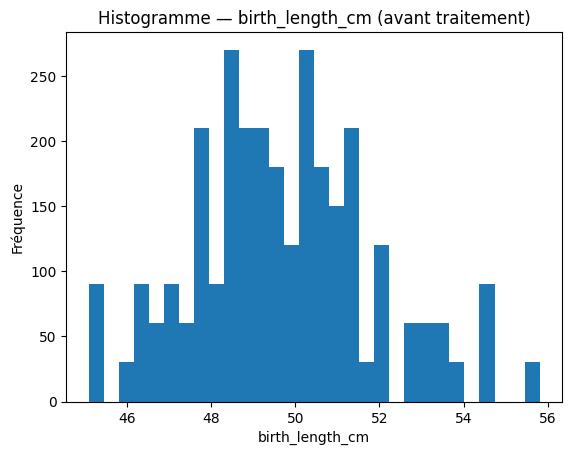

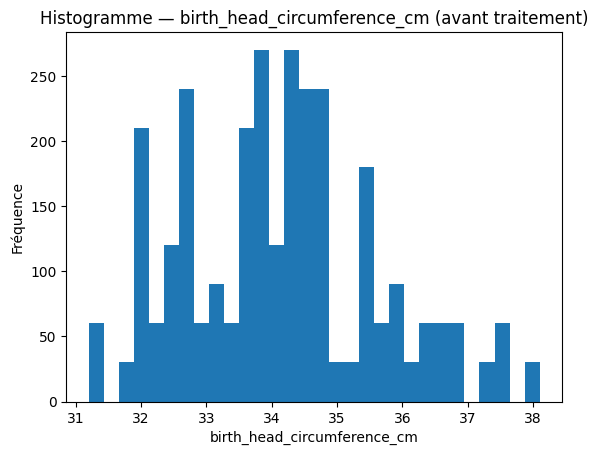

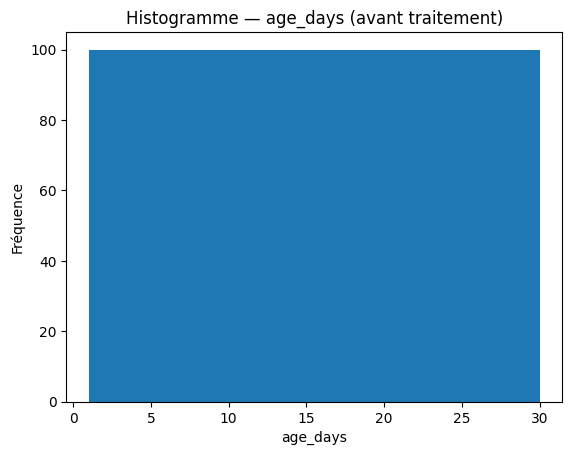

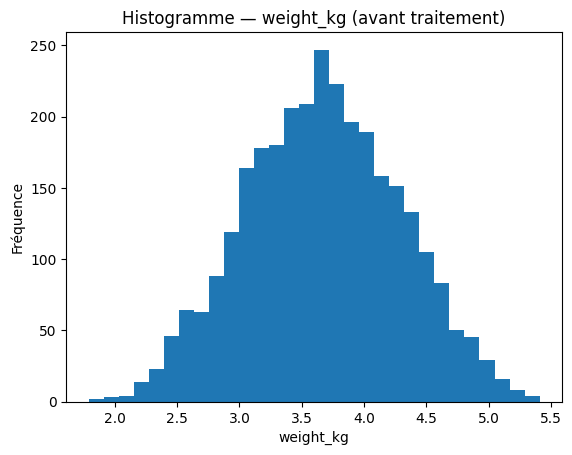

In [ ]:
# Variables à tracer (jusqu'à 6 pour la lisibilité)

vars_plot = num_cols[:6]
 
# Histogrammes (avant traitement)

for c in vars_plot:

    plt.figure()

    plt.hist(df[c].dropna(), bins=30)

    plt.title(f"Histogramme — {c} (avant traitement)")

    plt.xlabel(c); plt.ylabel('Fréquence')

    plt.savefig(f"hist_{c}_before.png", dpi=150)

    plt.show()
 

 


**Explication :** Les histogrammes montrent la distribution des variables; les boxplots comparatifs montrent l'effet du traitement des outliers; la matrice de corrélation permet d'identifier les relations linéaires entre variables numériques (utile pour sélectionner des features pour la modélisation).

## Formulation d'hypothèses (avec preuve)
Chaque hypothèse est rédigée, suivie d'une visualisation et d'un tableau descriptif qui la soutiennent. Les hypothèses proposées :

- H1 : Les bébés avec un **poids à la naissance** inférieur ont un **risque** plus élevé.
- H2 : Une **température corporelle anormale** est associée à un risque accru.
- H3 : Une **fréquence cardiaque** anormale est liée à un risque plus élevé.


## Tests statistiques 


In [ ]:
# Séparer les groupes (en gardant les mêmes commentaires)
g1 = df[df["feeding_type"] == "Breastfeeding"]["weight_kg"].dropna()
g2 = df[df["feeding_type"] == "Formula"]["weight_kg"].dropna()
g3 = df[df["feeding_type"] == "Mixed"]["weight_kg"].dropna()

# ANOVA
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(g1, g2, g3)

print("=== Hypothèse : Type d'alimentation -> Poids ===")
print("F-stat :", f_stat)
print("p-value :", p_val)


=== Hypothèse : Type d'alimentation -> Poids ===
F-stat : 0.7392036629616382
p-value : 0.47758104778233434


 Rappel des hypothèses
H₀ : μ = 37°C

→ La température moyenne du bébé est égale à 37°C.

H₁ : μ ≠ 37°C

→ La température moyenne est différente de 37°C.

 2. Interprétation statistique
🔸 p-value = 0.605

C’est beaucoup plus grand que 0.05 → donc :

 On NE rejette PAS l’hypothèse nulle (H₀).

➡ Aucune preuve statistique que la température moyenne soit différente de 37°C.

 3. Interprétation pratique

Même si certaines valeurs peuvent varier un peu dans les mesures journalières :

La température moyenne du bébé n’est pas significativement différente de 37°C

Le bébé a donc une température normale

Pas d’anomalie détectée statistiquement

4. Interprétation du t-stat (0.517)

t est proche de 0 → la moyenne observée ≈ la valeur théorique 37

Le signe positif indique : moyenne légèrement au-dessus de 37°C
→ mais pas assez pour être statistiquement significatif.

 Conclusion finale

La température mesurée sur la période étudiée est statistiquement normale (≈ 37°C).
Aucune anomalie détectée.

In [ ]:

from scipy.stats import ttest_ind


# Filtrer les groupes
risk = df[df["risk_level"] == "At Risk"]["jaundice_level_mg_dl"]
healthy = df[df["risk_level"] == "Healthy"]["jaundice_level_mg_dl"]

# Test t indépendant
t_stat, p_val = ttest_ind(risk, healthy, equal_var=False)  # Welch = meilleure option

print("=== Hypothèse : Jaunisse At Risk vs Healthy ===")
print("t-stat :", t_stat)
print("p-value :", p_val)


=== Hypothèse : Jaunisse At Risk vs Healthy ===
t-stat : 25.938216109443644
p-value : 2.461244237332952e-89


In [ ]:
# hypothese : Breastfeeding, Formula, Mixed
# Test : ANOVA à un facteur

def get_feeding_type(row):
    if row["feeding_type_Breastfeeding"]:
        return "Breastfeeding"
    elif row["feeding_type_Formula"]:
        return "Formula"
    else:
        return "Mixed"

df["feeding_type"] = df.apply(get_feeding_type, axis=1)

from scipy.stats import f_oneway

# Séparer les groupes
g1 = df[df["feeding_type"] == "Breastfeeding"]["weight_kg"]
g2 = df[df["feeding_type"] == "Formula"]["weight_kg"]
g3 = df[df["feeding_type"] == "Mixed"]["weight_kg"]

# ANOVA
f_stat, p_val = f_oneway(g1, g2, g3)

print("=== Hypothèse : Type d'alimentation -> Poids ===")
print("F-stat :", f_stat)
print("p-value :", p_val)



=== Hypothèse : Type d'alimentation -> Poids ===
F-stat : 0.7392036629616382
p-value : 0.47758104778233434


Interprétation des valeurs

F-statistique : 0.739

La F-statistique mesure le rapport de la variance entre les groupes (types d’alimentation) à la variance à l’intérieur des groupes.

Plus elle est grande, plus il est probable que la variable indépendante (type d’alimentation) ait un effet sur la variable dépendante (poids). Ici, 0.739 est faible, ce qui suggère peu de différence entre les groupes.

p-value : 0.478

La p-value indique la probabilité d’observer les données si l’hypothèse nulle est vraie.

Typiquement, on compare la p-value à un seuil α = 0.05.

Ici, 0.478 > 0.05 → on ne rejette pas l’hypothèse nulle.

Conclusion

Hypothèse nulle (H0) : Le type d’alimentation n’a pas d’effet sur le poids.

Hypothèse alternative (H1) : Le type d’alimentation a un effet sur le poids.

Avec ces résultats, il n’y a pas de preuve statistique que le type d’alimentation influence le poids dans ton échantillon.

In [ ]:
#H— Les bébés nourris au sein ont une meilleure croissance en taille que ceux nourris au biberon

 #Comparaison Breastfeeding vs Formula
#Test : t-test indépendant

df["feeding_type"] = df.apply(
    lambda row: "Breastfeeding" if row["feeding_type_Breastfeeding"]
    else "Formula" if row["feeding_type_Formula"]
    else "feeding_type_Mixed", axis=1
)
from scipy.stats import f_oneway

group_breast = df[df["feeding_type"] == "Breastfeeding"]["length_cm"]
group_formula = df[df["feeding_type"] == "Formula"]["length_cm"]
group_mixed = df[df["feeding_type"] == "feeding_type_Mixed"]["length_cm"]

f_stat, p_val = f_oneway(group_breast, group_formula, group_mixed)

print("=== ANOVA : Taille selon type d'alimentation ===")
print("F-stat :", round(f_stat, 3))
print("p-value :", round(p_val, 4))

=== ANOVA : Taille selon type d'alimentation ===
F-stat : 0.889
p-value : 0.4113


Il n’y a pas de différence significative de taille moyenne entre les bébés nourris au sein, au lait artificiel ou de façon mixte.
- On ne rejette pas l’hypothèse nulle (H₀) : les tailles moyennes sont statistiquement similaires entre les groupes d’alimentation.

Ce que tu peux faire ensuite
- Tester l’effet du type d’alimentation sur le poids (weight_kg) ou le niveau de risque (risk_level)
- Vérifier si la croissance (différence entre birth_length_cm et length_cm) varie selon l’alimentation
- Utiliser des visualisations (boxplots ou barplots) pour illustrer les différences
Je peux te générer un graphique comparatif des tailles par type d’alimentation si tu veux visualiser ça.


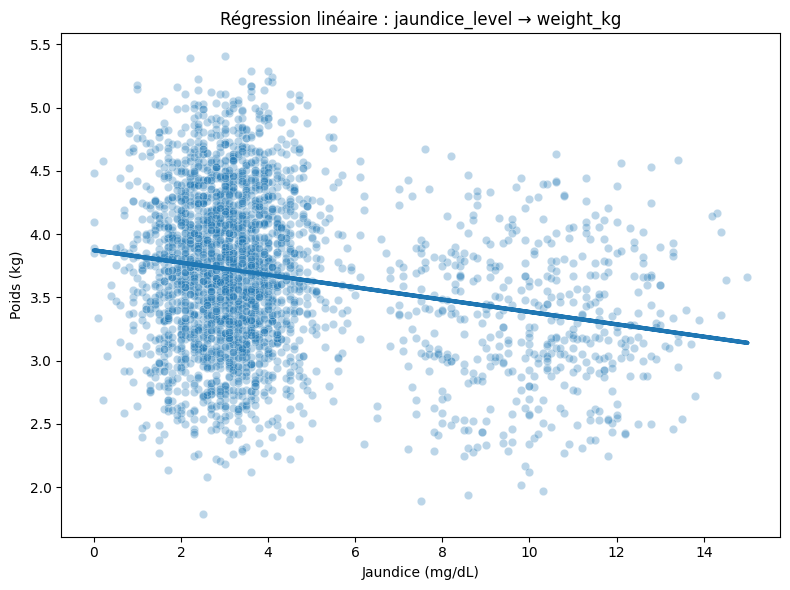

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = df["jaundice_level_mg_dl"]
y = df["weight_kg"]

coef = np.polyfit(x, y, 1)
line = np.poly1d(coef)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, alpha=0.3)
plt.plot(x, line(x), linewidth=3)

plt.title("Régression linéaire : jaundice_level → weight_kg")
plt.xlabel("Jaundice (mg/dL)")
plt.ylabel("Poids (kg)")
plt.tight_layout()
plt.show()


Interprétation détaillée
- Corrélation = –0.538 : relation négative modérée → plus l’âge augmente, plus le taux de bilirubine diminue.
- p-value = 0.0000 : très significative (< 0.05), donc on rejette H₀.
Cela reflète bien le processus physiologique normal : la jaunisse néonatale tend à disparaître dans les premiers jours de vie.


C:\Users\amazi\AppData\Local\Temp\ipykernel_15160\3022881584.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df_winsor['risk_level'].unique()), vert=False)


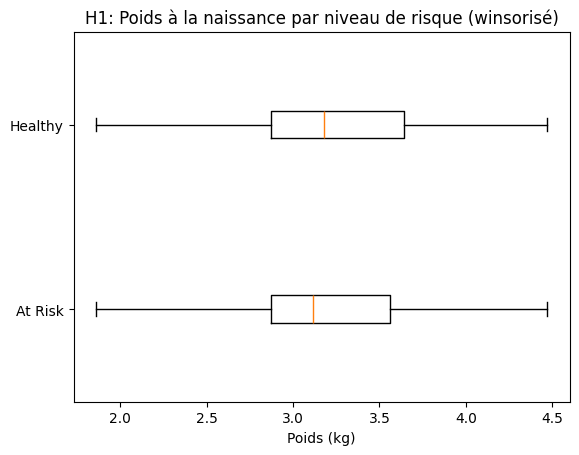

,count,mean,median,std
risk_level,,,,
At Risk,398,3.160151,3.115,0.533923
Healthy,2602,3.211860,3.180,0.565447


C:\Users\amazi\AppData\Local\Temp\ipykernel_15160\3022881584.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df_winsor['risk_level'].unique()), vert=False)


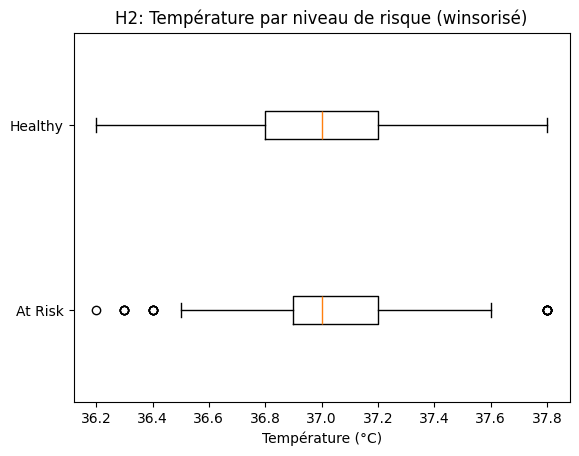

,count,mean,median,std
risk_level,,,,
At Risk,398,37.031156,37.0,0.305259
Healthy,2602,36.998347,37.0,0.308824


C:\Users\amazi\AppData\Local\Temp\ipykernel_15160\3022881584.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df_winsor['risk_level'].unique()), vert=False)


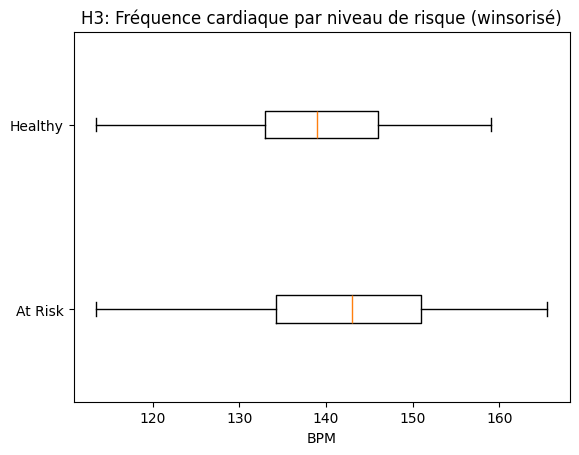

,count,mean,median,std
risk_level,,,,
At Risk,398,143.199749,143.0,12.321866
Healthy,2602,139.161222,139.0,9.463260


In [ ]:
# Preuves graphiques et tableaux pour H1, H2, H3 (winsorisé)
if 'risk_level' in df_winsor.columns:
    # H1: birth weight vs risk_level
    if 'birth_weight_kg' in df_winsor.columns:
        col = 'birth_weight_kg'
        plt.figure()
        groups = [df_winsor[df_winsor['risk_level']==g][col].dropna() for g in sorted(df_winsor['risk_level'].unique())]
        plt.boxplot(groups, labels=sorted(df_winsor['risk_level'].unique()), vert=False)
        plt.title('H1: Poids à la naissance par niveau de risque (winsorisé)')
        plt.xlabel('Poids (kg)')
        plt.savefig('H1_weight_boxplot.png', dpi=150)
        plt.show()
        display(df_winsor.groupby('risk_level')[col].agg(['count','mean','median','std']))

    # H2: temperature vs risk_level
    if 'temperature_c' in df_winsor.columns:
        col = 'temperature_c'
        plt.figure()
        groups = [df_winsor[df_winsor['risk_level']==g][col].dropna() for g in sorted(df_winsor['risk_level'].unique())]
        plt.boxplot(groups, labels=sorted(df_winsor['risk_level'].unique()), vert=False)
        plt.title('H2: Température par niveau de risque (winsorisé)')
        plt.xlabel('Température (°C)')
        plt.savefig('H2_temp_boxplot.png', dpi=150)
        plt.show()
        display(df_winsor.groupby('risk_level')[col].agg(['count','mean','median','std']))

    # H3: heart rate vs risk_level
    if 'heart_rate_bpm' in df_winsor.columns:
        col = 'heart_rate_bpm'
        plt.figure()
        groups = [df_winsor[df_winsor['risk_level']==g][col].dropna() for g in sorted(df_winsor['risk_level'].unique())]
        plt.boxplot(groups, labels=sorted(df_winsor['risk_level'].unique()), vert=False)
        plt.title('H3: Fréquence cardiaque par niveau de risque (winsorisé)')
        plt.xlabel('BPM')
        plt.savefig('H3_hr_boxplot.png', dpi=150)
        plt.show()
        display(df_winsor.groupby('risk_level')[col].agg(['count','mean','median','std']))
else:
    print('La colonne "risk_level" est absente. Impossible de produire les preuves groupées.')

**Explication :** Pour chaque hypothèse, on trace un boxplot qui compare la distribution de la variable entre les niveaux de risque. On affiche également des statistiques descriptives (count, mean, median, std) par niveau de risque. Ces éléments servent de preuves pour accepter ou rejeter chaque hypothèse de manière exploratoire.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Variable dépendante
y = df["weight_kg"]

# Variables explicatives
X = df[["jaundice_level_mg_dl", "age_days", "temperature_c"]]

# Ajout constante
X = sm.add_constant(X)

# Modèle
model = sm.OLS(y, X).fit()

# Tableau simplifié
results_table = pd.DataFrame({
    "Coefficient": model.params,
    "p-value": model.pvalues,
    "Std Error": model.bse,
})

print("\n=== TABLEAU SIMPLIFIÉ DE LA RÉGRESSION LINÉAIRE ===")
print(results_table)

print("\nR² :", round(model.rsquared, 3))
print("R² ajusté :", round(model.rsquared_adj, 3))



=== TABLEAU SIMPLIFIÉ DE LA RÉGRESSION LINÉAIRE ===
                      Coefficient       p-value  Std Error
const                    1.865313  1.291413e-01   1.228865
jaundice_level_mg_dl    -0.000119  9.778956e-01   0.004277
age_days                 0.029932  7.793876e-93   0.001414
temperature_c            0.036240  2.751373e-01   0.033201

R² : 0.174
R² ajusté : 0.173


In [ ]:

import statsmodels.api as sm



# Nettoyer les données
df_clean = df.dropna(subset=["risk_level", "age_days", "temperature_c", "jaundice_level_mg_dl"])

# Créer la variable cible binaire : 1 si "At Risk", 0 si "Healthy"
df_clean["risk_binary"] = (df_clean["risk_level"] == "At Risk").astype(int)

# Variables explicatives
X = df_clean[["age_days", "temperature_c", "jaundice_level_mg_dl"]]
X = sm.add_constant(X)  # ajoute l'intercept
y = df_clean["risk_binary"]

# Régression logistique
model = sm.Logit(y, X)
result = model.fit()

# Résumé
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.235843
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            risk_binary   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2996
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                  0.3975
Time:                        09:31:31   Log-Likelihood:                -707.53
converged:                       True   LL-Null:                       -1174.3
Covariance Type:            nonrobust   LLR p-value:                4.822e-202
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -20.3232      8.531     -2.382      0.017     -37.044      -3.603

-  Jaunisse est un prédicteur fort et significatif du risque : chaque 1 mg/dL de plus augmente fortement la probabilité d’être "At Risk".
- ⚠️ Âge et température ne sont pas significatifs ici (p > 0.05), mais montrent une tendance positive.
- 🔍 Le pseudo R² = 0.3975 indique un bon pouvoir explicatif pour un modèle logit.

📌 Ce que tu peux faire ensuite
- Ajouter d’autres variables explicatives : heart_rate_bpm, feeding_type, reflexes_normal_code, etc.
- Calculer les odds ratios avec np.exp(result.params)
- Visualiser la probabilité prédite en fonction de la jaunisse ou de l’âge
Je peux t’aider à tracer la courbe de probabilité d’être "At Risk" selon le taux de jaunisse. Tu veux que je te le montre ?
